In [2]:
#Delay Effect
"""
Implementacion fuera de linea del efecto delay en un archivo de audio.
"""

import numpy as np
import matplotlib.pyplot as plot
from scipy.io import wavfile
from IPython.display import Audio, display

In [8]:

#from: https://github.com/spatialaudio/selected-topics-in-audio-signal-processing-exercises/blob/master/tools.py
def fade(x, in_length, out_length=None, type='l', copy=True):
    """Apply fade in/out to a signal.

    If `x` is two-dimenstional, this works along the columns (= first
    axis).

    This is based on the *fade* effect of SoX, see:
    http://sox.sourceforge.net/sox.html

    The C implementation can be found here:
    http://sourceforge.net/p/sox/code/ci/master/tree/src/fade.c

    Parameters
    ----------
    x : array_like
        Input signal.
    in_length : int
        Length of fade-in in samples (contrary to SoX, where this is
        specified in seconds).
    out_length : int, optional
        Length of fade-out in samples.  If not specified, `fade_in` is
        used also for the fade-out.
    type : {'t', 'q', 'h', 'l', 'p'}, optional
        Select the shape of the fade curve: 'q' for quarter of a sine
        wave, 'h' for half a sine wave, 't' for linear ("triangular")
        slope, 'l' for logarithmic, and 'p' for inverted parabola.
        The default is logarithmic.
    copy : bool, optional
        If `False`, the fade is applied in-place and a reference to
        `x` is returned.

    """
    x = np.array(x, copy=copy)

    if out_length is None:
        out_length = in_length

    def make_fade(length, type):
        fade = np.arange(length) / length
        if type == 't':  # triangle
            pass
        elif type == 'q':  # quarter of sinewave
            fade = np.sin(fade * np.pi / 2)
        elif type == 'h':  # half of sinewave... eh cosine wave
            fade = (1 - np.cos(fade * np.pi)) / 2
        elif type == 'l':  # logarithmic
            fade = np.power(0.1, (1 - fade) * 5)  # 5 means 100 db attenuation
        elif type == 'p':  # inverted parabola
            fade = (1 - (1 - fade)**2)
        else:
            raise ValueError("Unknown fade type {0!r}".format(type))
        return fade

    # Using .T w/o [:] causes error: https://github.com/numpy/numpy/issues/2667
    x[:in_length].T[:] *= make_fade(in_length, type)
    x[len(x) - out_length:].T[:] *= make_fade(out_length, type)[::-1]
    return x



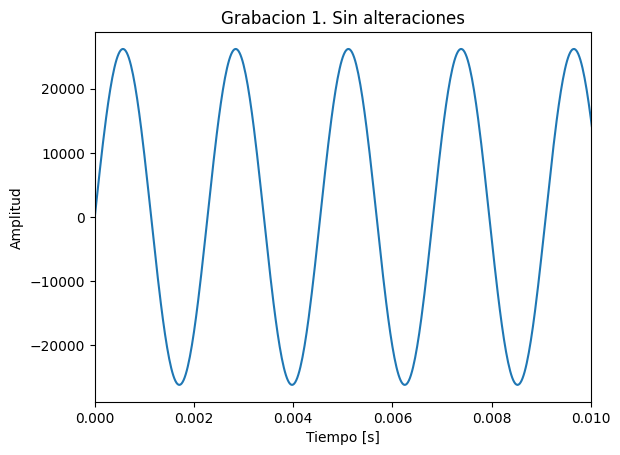

In [7]:
#Muestra de audio original.
sample_rate, data = wavfile.read('./audios/sine-mono.wav')
#Duracion del archivo original de audio.
duration = 1.0 
time = np.arange(0, duration, 1/sample_rate)
silence = np.zeros(sample_rate*int(duration))

#Reproducir audio original.
display(Audio('./audios/SINE.wav', autoplay=False))

#dibujar audio
plot.plot(time, data[:len(time)])

#Ajustar escala en X\
plot.xlim(0, 0.01)

plot.xlabel('Tiempo [s]')
plot.ylabel('Amplitud')
plot.title('Grabacion 1. Sin alteraciones') 
plot.show()




## Resultado del efecto

### Grabacion 1

[0. 0. 0. ... 0. 0. 0.]
[ 0.          0.          0.         ... -2.20068359 -0.73583984
 -0.        ]


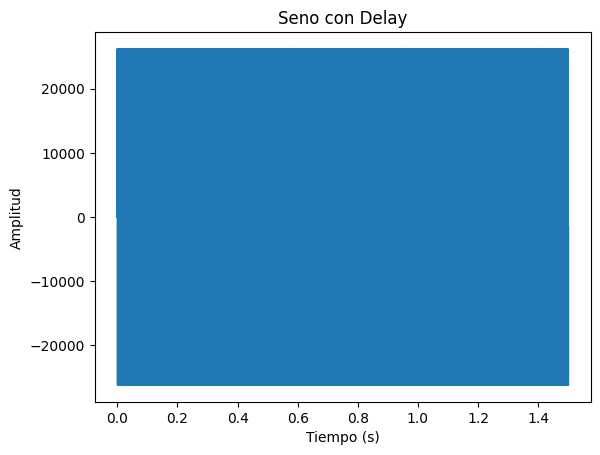

In [7]:
#Muestra de audio.
sample_rate, data = wavfile.read('./audios/sine-mono.wav')
#Duracion del archivo original de audio.
duration = 1.5 
time = np.arange(0, duration, 1.0/sample_rate)
delay = 1.5
silence = np.zeros(sample_rate*int(delay))

print(silence)

#Concatenar el retraso en muestras con la señal original.
delay_data = np.concatenate((silence, data))



print(delay_data)

#Sumar ambas señales.
data.resize(delay_data.shape)
data = data + delay_data
#Reproducir audio modificado.
display(Audio(data, rate=sample_rate, autoplay=False))

#dibujar audio
plot.plot(time, data[:len(time)])

#Ajustar escala en X\
#plot.xlim(0, 3)

plot.title('Seno con Delay')
plot.xlabel('Tiempo (s)')
plot.ylabel('Amplitud')
plot.show()


### Grabacion 2


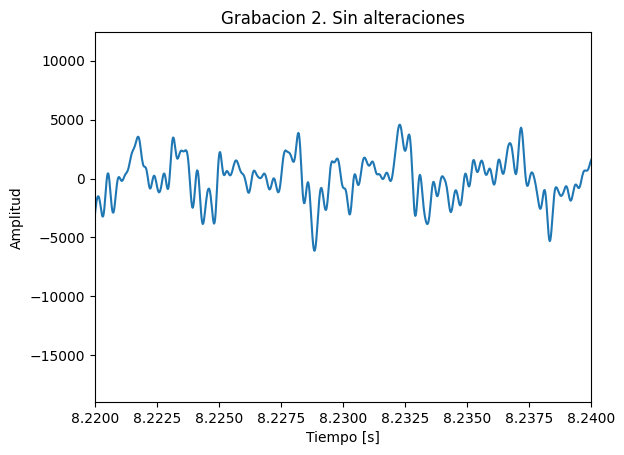

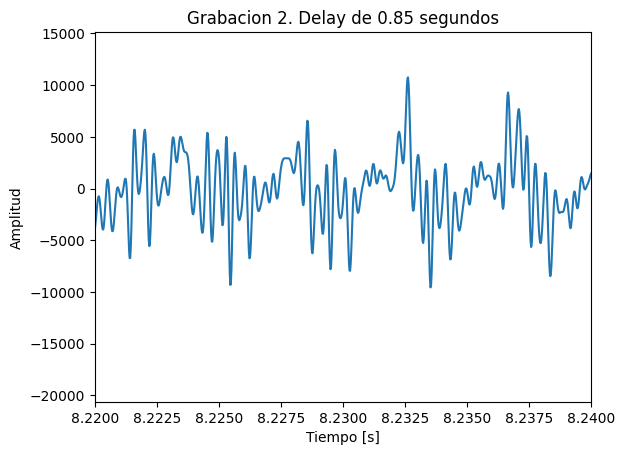

In [80]:
def seconds_to_samples(seconds, sample_rate):
    return int(seconds*sample_rate)

#utilizando un buffer 'circular' para el efecto de delay.

#Muestra de audio original.
sample_rate, data = wavfile.read('./audios/masterofpuppets-mono.wav')
#Duracion del archivo original de audio.
duration = 9
time = np.arange(0, duration, 1.0/sample_rate)
delay_size = 0.85

#Graficar audio original.
plot.plot(time, data[:len(time)])
plot.xlim(8.22, 8.24)
plot.xlabel('Tiempo [s]')
plot.ylabel('Amplitud')
plot.title('Grabacion 2. Sin alteraciones')
plot.show()


buffer = np.empty(1)

for i in range(0,data.size):

    buffer = np.append(buffer,data[i])  # Contiuamente llenar el buffer.
    
    if buffer.size == int(seconds_to_samples(delay_size, sample_rate)): 
        #Aplicar fade out al buffer.
        buffer = fade(buffer, in_length=int(seconds_to_samples(0.09,sample_rate)), out_length=int(seconds_to_samples(0.25, sample_rate)), type='l', copy=False) * 0.55
        #Comenzar a sumar el buffer.
        for j in range(0, buffer.size):   
            if i+j < data.size:
                data[i+j] += buffer[j]        
        buffer = np.empty(1)

#Reproducir audio modificado.
display(Audio(data, rate=sample_rate, autoplay=False))

#Graficar audio modificado.
plot.plot(time, data[:len(time)])
plot.xlim(8.22, 8.24)
plot.xlabel('Tiempo [s]')
plot.ylabel('Amplitud')
plot.title('Grabacion 2. Delay de ' + str(delay_size) + ' segundos')
plot.show()

In [ ]:
#